In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ase.build import graphene
from abtem.reconstruct import RegularizedPtychographicOperator
import abtem

In [3]:
abtem.config.set({"device": "cpu"})

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Beam view'}, xlabel='x [Å]', ylabel='y [Å]'>)

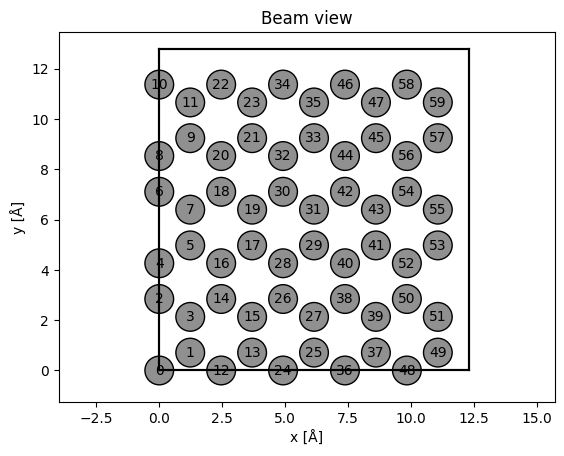

In [4]:
atoms = abtem.orthogonalize_cell(graphene(vacuum=2))

atoms *= (5, 3, 1)
abtem.show_atoms(atoms, title="Beam view", numbering=True, merge=False)

[########################################] | 100% Completed | 203.61 ms


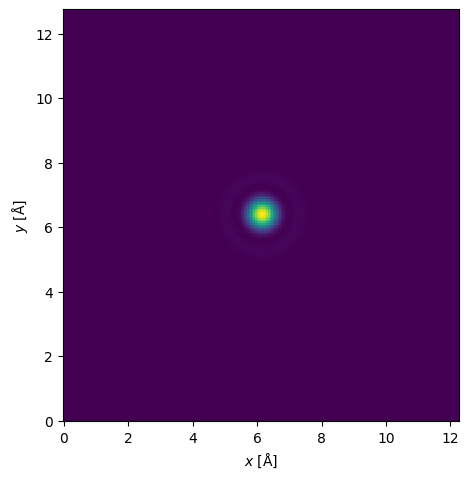

In [5]:
# Setup potential
potential = abtem.Potential(atoms, sampling=0.05)

# Setup probe
probe = abtem.Probe(energy=80e3, semiangle_cutoff=30)
probe.grid.match(potential)

probe.show()

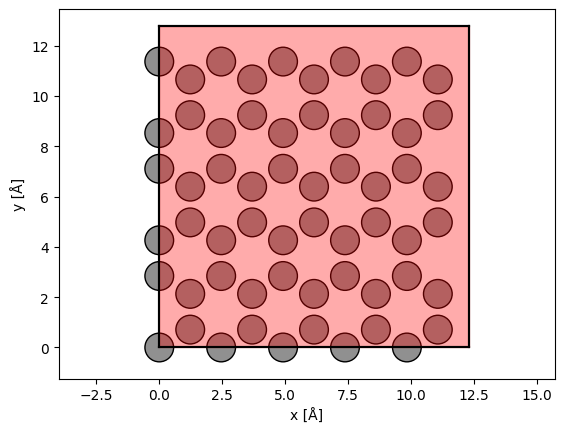

In [6]:
grid_scan = abtem.GridScan(
    start=(0, 0),
    end=(1, 1),
    sampling=probe.aperture.nyquist_sampling,
    fractional=True,
    potential=potential,
)

fig, ax = abtem.show_atoms(atoms)

grid_scan.add_to_plot(ax)


In [7]:
# detector = abtem.FlexibleAnnularDetector()
# flexible_measurement = probe.scan(potential, scan=grid_scan, detectors=detector)

# flexible_measurement.compute()

detector = abtem.PixelatedDetector(max_angle=80)
measurements = probe.scan(potential, scan=grid_scan, detectors=detector)

measurements.array

dask.array<apply_transform, shape=(36, 37, 50, 52), dtype=float32, chunksize=(16, 15, 50, 52), chunktype=numpy.ndarray>

In [8]:
measurements.compute()


[########################################] | 100% Completed | 5.08 sms


In [9]:
ptycho_operator = RegularizedPtychographicOperator(
    measurements,
    parameters={"object_px_padding": (0, 0)},
)

ptycho_operator.preprocess()

In [10]:
rpie_objects, rpie_probes, rpie_positions, rpie_sse = ptycho_operator.reconstruct(
    max_iterations=5, return_iterations=True, random_seed=1, verbose=True
)

Ptychographic reconstruction will perform the following steps:
--Regularized PIE for 6660 steps
--Probe correction is enabled


----Iteration 0, SSE = 2.515e-07
----Iteration 1, SSE = 3.988e-08
----Iteration 2, SSE = 6.425e-09
----Iteration 3, SSE = 5.164e-09
----Iteration 4, SSE = 5.074e-09


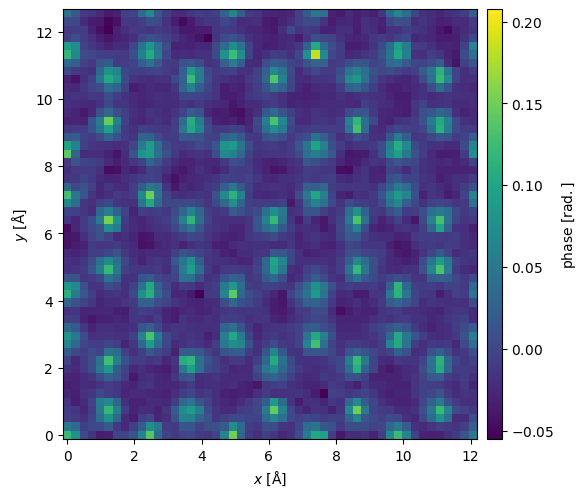

In [11]:
rpie_objects.phase().show(
    explode=False, figsize=(14, 5), cbar=True, common_color_scale=True
);

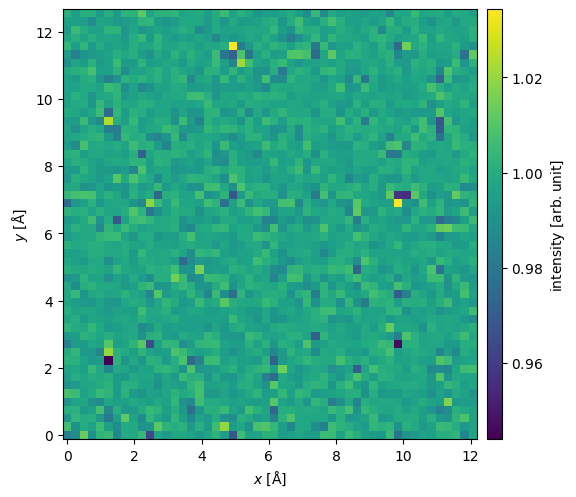

In [12]:
rpie_objects.intensity().show(
    explode=False, figsize=(14, 5), cbar=True, common_color_scale=True
);